## Testing Method 
---

In [1]:
import crowded.simulate as cs
import crowded.method as cm
import pandas as pd
from pycm import *

Based on the crowdsoursing experiment GEO metadata classification

#### Simulate the tasks

In [2]:
total_tasks = 1643
p_hard_tasks = 0
number_of_valid_answers = 9
df_tasks = cs.Tasks(number_of_valid_answers).create(total_tasks, p_hard_tasks)
df_tasks.head()

,task_id,true_answers,label_task,prob_task
id,,,,
task_ArjXH49SsZbq,task_ArjXH49SsZbq,cost,easy_task,0.88
task_56dEdT5bSkGD,task_56dEdT5bSkGD,cost,easy_task,0.76
task_GVeUvZRnUWg4,task_GVeUvZRnUWg4,entrapments,easy_task,0.71
task_C23CsXzAnu4j,task_C23CsXzAnu4j,patterns,easy_task,0.58
task_Wy6zDBGvgLVh,task_Wy6zDBGvgLVh,entrapments,easy_task,0.57


#### Simulate the workers

In [3]:
total_workers = 145
workers = cs.Workers().create(total_workers)
workers.head()

,worker_id,prob_worker
id,,
3GeK47dRLKQo,3GeK47dRLKQo,0.667845
jhseNub7zBWM,jhseNub7zBWM,0.723190
E3Jr9cjPUgQW,E3Jr9cjPUgQW,0.737417
Kj4rRQdjtENo,Kj4rRQdjtENo,0.929135
JL5UY5VuhR5b,JL5UY5VuhR5b,0.838194


#### Split the tasks

In [4]:
PTT = .3
def tasks_split(df, p = PTT):
    _train = df.sample(frac=p, random_state=23)
    _rest = df.loc[df.index.difference(_train.index)]
    return _train, _rest

In [5]:
tasks_train, tasks_rest = tasks_split(df_tasks, .3)

#### Assigning workers to tasks

In [6]:
wpt = 3
#workers per task always smaller than the number of workers
df_tw = cs.AssignTasks(tasks_train, workers, wpt).create()
df_tw.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker
0,task_4A99qncxhvad,LwSJE7MyZVyA,strip,easy_task,0.66,0.824189
1,task_4A99qncxhvad,TFYVHRE475xF,strip,easy_task,0.66,0.913039
2,task_4A99qncxhvad,qHVukHL8aPJE,strip,easy_task,0.66,0.855600
3,task_YsqYjMKuQ8Zp,VUAsBDdcJjkt,drink,easy_task,0.99,0.650981
4,task_YsqYjMKuQ8Zp,wUdLQC4GFKdE,drink,easy_task,0.99,0.919136


#### Compute the probability to assess the tasks

In [7]:
keys = df_tasks['true_answers'].unique()
keys

array(['cost', 'entrapments', 'patterns', 'scream', 'drink', 'strip',
       'pronoun', 'painters', 'parcel'], dtype=object)

In [8]:
cp = cm.ComputeProbability(df_tw['prob_task'], df_tw['prob_worker'], keys)
df_tw['worker_answers'] = cm.WorkerAnswer(df_tw['true_answers'], cp.predict(), keys).match()
df_tw['performance'] = cp.predict()
df_tw.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker,worker_answers,performance
0,task_4A99qncxhvad,LwSJE7MyZVyA,strip,easy_task,0.66,0.824189,strip,1
1,task_4A99qncxhvad,TFYVHRE475xF,strip,easy_task,0.66,0.913039,strip,1
2,task_4A99qncxhvad,qHVukHL8aPJE,strip,easy_task,0.66,0.855600,strip,1
3,task_YsqYjMKuQ8Zp,VUAsBDdcJjkt,drink,easy_task,0.99,0.650981,drink,1
4,task_YsqYjMKuQ8Zp,wUdLQC4GFKdE,drink,easy_task,0.99,0.919136,drink,1


#### Assess the performance and get the good workers

In [9]:
perf = cm.Performance(df_tw)
df_workers = perf._workers()
df_workers.head()

,worker_id,prob_task,prob_worker,performance,worker_ability,task_id
0,zZZ8e4BdnXNg,0.793333,0.836177,1.0,good_worker,9
1,bvpreY4Bd298,0.753333,0.713090,1.0,good_worker,9
2,SHFU9DT3g8vQ,0.737143,0.689164,1.0,good_worker,7
3,S9vyRY3oJK6c,0.742222,0.635581,1.0,good_worker,18
4,jhseNub7zBWM,0.760000,0.723190,1.0,good_worker,8


In [10]:
good_workers = workers.loc[perf.good_workers()]
good_workers

,worker_id,prob_worker
id,,
SHFU9DT3g8vQ,SHFU9DT3g8vQ,0.689164
S9vyRY3oJK6c,S9vyRY3oJK6c,0.635581
QEfNRtQ9orxG,QEfNRtQ9orxG,0.713859
mPwdbXYbmXSg,mPwdbXYbmXSg,0.735663
nQsTL4QAjmmm,nQsTL4QAjmmm,0.650296
KN3MxXYvfnKM,KN3MxXYvfnKM,0.866009
KMGVQJZ8UUZx,KMGVQJZ8UUZx,0.464756
JVfx7Zap7D5t,JVfx7Zap7D5t,0.539681
SNHELLeF2ckJ,SNHELLeF2ckJ,0.857792


#### Assign the good workers to the rest of the tasks

In [11]:
#workers per task always smaller than the number of workers
df_tw_2 = cs.AssignTasks(tasks_rest, good_workers, wpt).create()
df_tw_2.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker
0,task_233aNN6QQQKS,B3dHEJdWY6M5,cost,easy_task,0.72,0.806722
1,task_233aNN6QQQKS,h26FCsDjwRcb,cost,easy_task,0.72,0.466360
2,task_233aNN6QQQKS,FKnyWg447HtV,cost,easy_task,0.72,0.916024
3,task_24U9uskUZJA2,ECx7CtTeqGRK,strip,easy_task,0.50,0.582606
4,task_24U9uskUZJA2,mPwdbXYbmXSg,strip,easy_task,0.50,0.735663


#### Compute probability to the rest of the tasks

In [12]:
cp2 = cm.ComputeProbability(df_tw_2['prob_task'], df_tw_2['prob_worker'], keys)
df_tw_2['worker_answers'] = cm.WorkerAnswer(df_tw_2['true_answers'], cp2.predict(), keys).match()
df_tw_2['performance'] = cp2.predict()
df_tw_2.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker,worker_answers,performance
0,task_233aNN6QQQKS,B3dHEJdWY6M5,cost,easy_task,0.72,0.806722,cost,0
1,task_233aNN6QQQKS,h26FCsDjwRcb,cost,easy_task,0.72,0.466360,strip,1
2,task_233aNN6QQQKS,FKnyWg447HtV,cost,easy_task,0.72,0.916024,cost,1
3,task_24U9uskUZJA2,ECx7CtTeqGRK,strip,easy_task,0.50,0.582606,pronoun,1
4,task_24U9uskUZJA2,mPwdbXYbmXSg,strip,easy_task,0.50,0.735663,strip,1


#### Merge the data and get the real accuracy

In [13]:
df = df_tw.append(df_tw_2)

In [14]:
mat = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
print(mat.Overall_ACC)

0.945425035504159


In [15]:
pd.DataFrame(mat.table)

,cost,drink,entrapments,painters,parcel,patterns,pronoun,scream,strip
cost,462,3,3,4,4,3,5,2,4
drink,4,560,3,2,2,4,3,3,2
entrapments,5,5,508,1,6,2,4,2,5
painters,0,6,3,483,3,3,4,2,3
parcel,5,4,2,3,554,6,5,7,8
patterns,2,6,6,5,3,483,3,1,5
pronoun,4,7,2,2,2,4,564,6,3
scream,6,5,5,3,3,5,4,507,7
strip,4,4,2,4,2,3,2,4,539


#### Compare with 1 stage

In [16]:
df_tw1 = cs.AssignTasks(df_tasks, workers, wpt).create()
cp1 = cm.ComputeProbability(df_tw1['prob_task'], df_tw1['prob_worker'], keys)
df_tw1['worker_answers'] = cm.WorkerAnswer(df_tw1['true_answers'], cp1.predict(), keys).match()
df_tw1['performance'] = cp1.predict()

In [17]:
mat = ConfusionMatrix(list(df_tw1['true_answers']), list(df_tw1['worker_answers']))
print(mat.Overall_ACC)

0.938932846419152


In [18]:
pd.DataFrame(mat.table)

,cost,drink,entrapments,painters,parcel,patterns,pronoun,scream,strip
cost,457,1,6,6,6,6,5,5,0
drink,7,563,4,3,5,2,3,3,7
entrapments,6,3,496,0,8,5,6,3,2
painters,3,1,3,482,4,4,2,4,4
parcel,6,6,1,3,540,7,4,3,4
patterns,1,5,7,1,3,476,6,4,3
pronoun,3,7,5,5,3,3,560,3,3
scream,5,7,7,3,6,6,5,506,5
strip,4,7,5,4,4,4,3,3,548


#####  The accuracy of 1 stage algorithm is lower than the 2 stages algorithm *

---
### Overall Accuracy (Create Crowded Module)

In [19]:
import crowded.make as mk
import time; start_time = time.monotonic()
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
tasks = [1000, 2000]
workers = [100, 200]
hard_t = [0.5, 1]
prop = [0.3,0.7]
wpt = [3,9]
key = [7,9,11]
stg = 1

In [22]:
def _combinations(tasks, workers, hard_t, prop, wpt, key):
    table = []
    for t in tasks:
        for w in workers:
            for h in hard_t:
                for p in prop:
                    for x in wpt:
                        for k in key:
                            table.append([t, w, h, p, x, k])
    return table


def simulate_scenarios(tasks, workers, hard_t, prop, wpt, key, stages=2):
    sim = _combinations(tasks, workers, hard_t, prop, wpt, key)
    for idx, row in enumerate(sim):
        mk._update_progress("CrowdED simulations progress", (idx + 1) / len(sim))
        try:
            if stages == 2:
                df = mk.crowd_table(total_tasks=sim[idx][0], total_workers=sim[idx][1], p_hard_tasks=sim[idx][2], ptt=sim[idx][3], wpt=sim[idx][4], nk=sim[idx][5])
            else:
                df = mk.crowd_table_one_stage(total_tasks=sim[idx][0], total_workers=sim[idx][1], p_hard_tasks=sim[idx][2], ptt=sim[idx][3], wpt=sim[idx][4], nk=sim[idx][5])
            mat = ConfusionMatrix(df['true_answers'].tolist(),df['worker_answers'].tolist())
            sim[idx].insert(6, round(mat.Overall_ACC, 4))
            sim[idx].insert(7, round(mat.CrossEntropy, 4))
            sim[idx].insert(8, round(sum([i for i in mat.F1.values()]) / len([i for i in mat.F1.values()]), 4))
        except Exception:
            pass
    return sim

In [23]:
simulations = pd.DataFrame(simulate_scenarios(tasks, workers, hard_t, prop, wpt, key, stg)).fillna(0)
simulations.columns = ['total_tasks', 'total_workers', 'proportion_hard_tasks','proportion_train_tasks', 'workers_per_task', 'total_keys','accuracy','cross_entropy','f1']
sttime = datetime.now().strftime('%Y%m%d_%H:%M_')
end_time = time.monotonic()
ex_time = timedelta(seconds=end_time - start_time)
#simulations.to_csv('data/' + str(sttime) + 'simulations'+ str(stg)+ 'stg_execution_time_'+str(ex_time)+'.csv', index=False)
print("Simulations computed - Execution time: {}".format(ex_time))

CrowdED simulations progress: [####################] 100.0% DONE
Simulations computed - Execution time: 0:01:48.576964


In [24]:
simulations.sort_values('accuracy', ascending=False).head(10)

,total_tasks,total_workers,proportion_hard_tasks,proportion_train_tasks,workers_per_task,total_keys,accuracy,cross_entropy,f1
53,2000,100,0.5,0.3,9,11,0.8933,3.4564,0.8930
5,1000,100,0.5,0.3,9,11,0.8908,3.4533,0.8903
2,1000,100,0.5,0.3,3,11,0.8903,3.4539,0.8902
59,2000,100,0.5,0.7,9,11,0.8857,3.4565,0.8856
29,1000,200,0.5,0.3,9,11,0.8852,3.4566,0.8848
35,1000,200,0.5,0.7,9,11,0.8839,3.4555,0.8836
8,1000,100,0.5,0.7,3,11,0.8827,3.4509,0.8817
1,1000,100,0.5,0.3,3,9,0.8810,3.1677,0.8806
32,1000,200,0.5,0.7,3,11,0.8803,3.4574,0.8802
80,2000,200,0.5,0.7,3,11,0.8797,3.4534,0.8789


In [25]:
print('Percentage with accuracy 0: {}%\nTotal Combinations: {}'.format(
    round(len(simulations[simulations['accuracy'] == 0])*100 / len(simulations),2),len(simulations)))

Percentage with accuracy 0: 0.0%
Total Combinations: 96


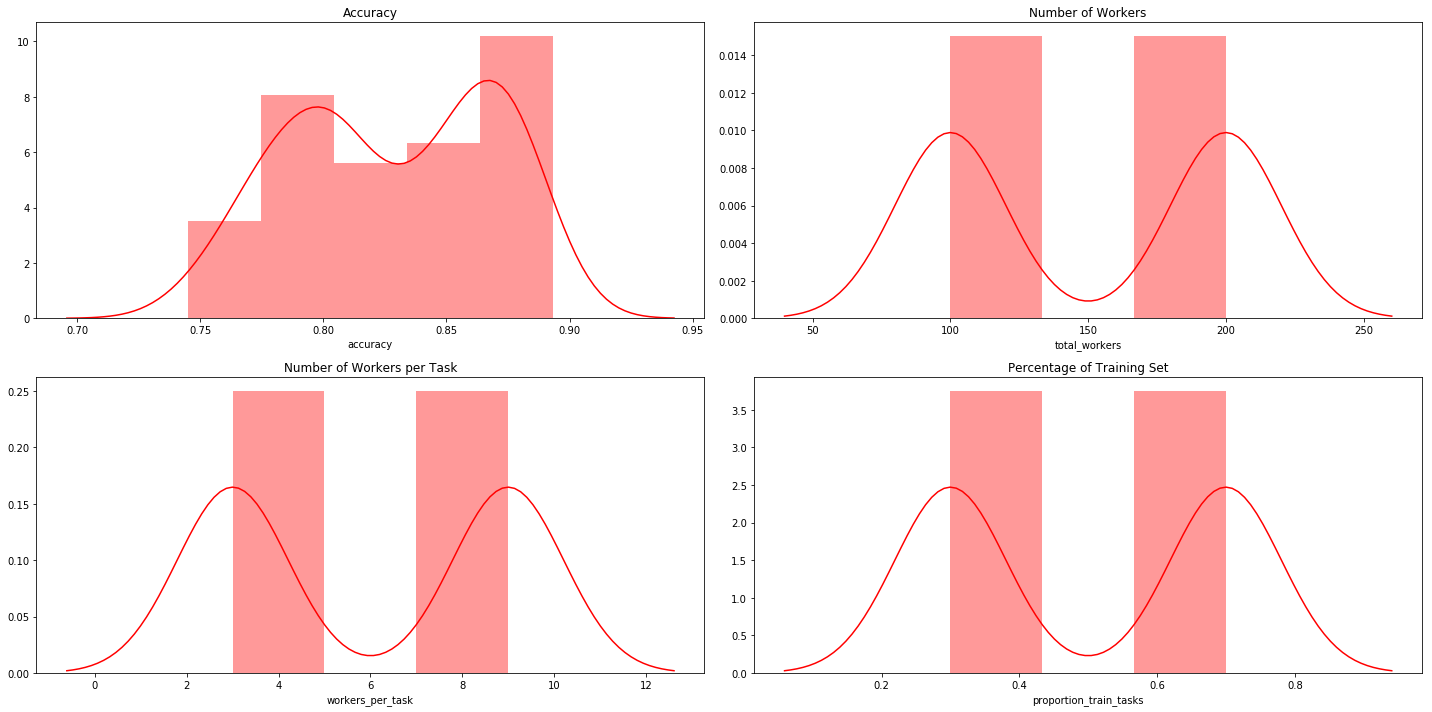

In [26]:
plt.figure(figsize=[20, 10])
plt.subplot(2,2,1)
sns.distplot(simulations['accuracy'], color="r")
plt.title('Accuracy')
plt.subplot(2,2,2)
sns.distplot(simulations['total_workers'], color="r")
plt.title('Number of Workers')
plt.subplot(2,2,3)
sns.distplot(simulations['workers_per_task'], color="r")
plt.title('Number of Workers per Task')
plt.subplot(2,2,4)
sns.distplot(simulations['proportion_train_tasks'], color="r")
plt.title('Percentage of Training Set')
plt.tight_layout()
#plt.savefig('../reports/test-retest_density_grid.png')

In [27]:
top_scenarios = simulations[simulations['accuracy'] >= simulations.quantile(.8)['accuracy']]

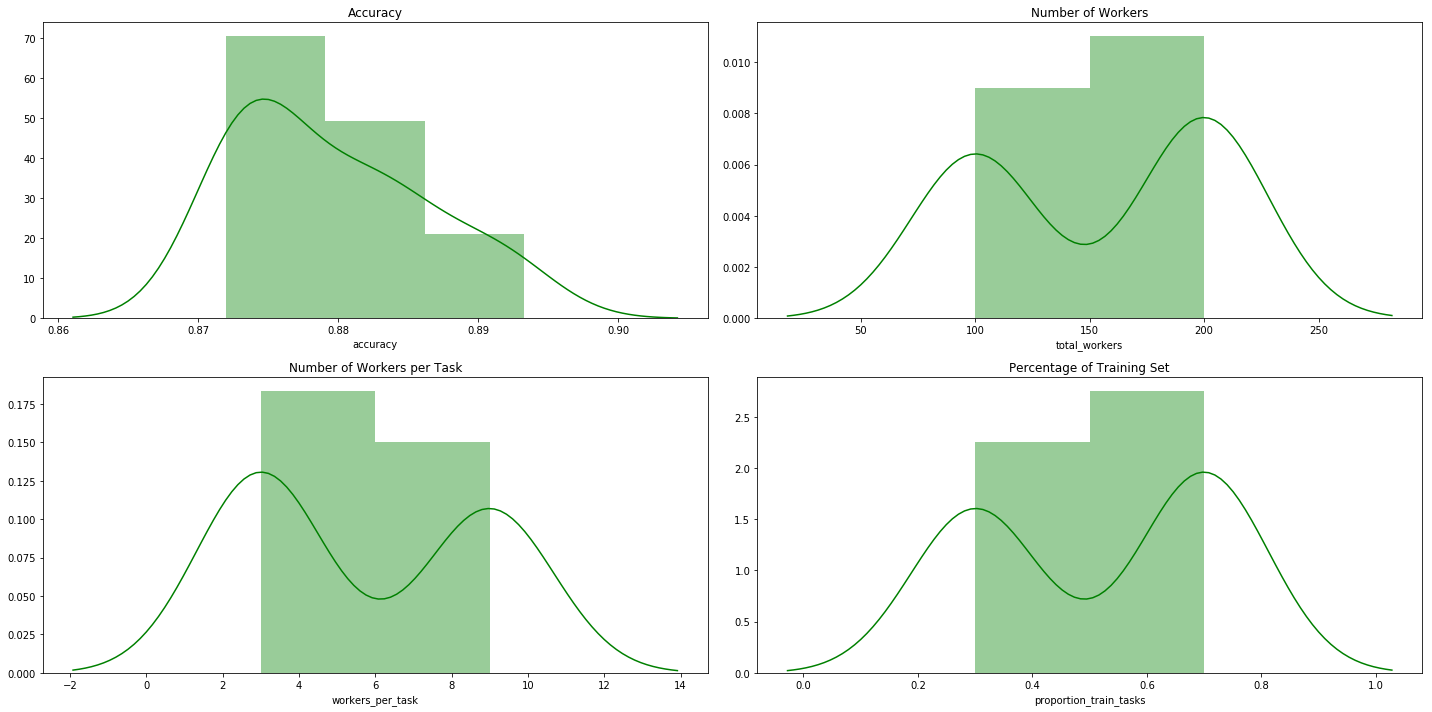

In [28]:
plt.figure(figsize=[20, 10])
plt.subplot(2,2,1)
sns.distplot(top_scenarios['accuracy'], color="g")
plt.title('Accuracy')
plt.subplot(2,2,2)
sns.distplot(top_scenarios['total_workers'], color="g")
plt.title('Number of Workers')
plt.subplot(2,2,3)
sns.distplot(top_scenarios['workers_per_task'], color="g")
plt.title('Number of Workers per Task')
plt.subplot(2,2,4)
sns.distplot(top_scenarios['proportion_train_tasks'], color="g")
plt.title('Percentage of Training Set')
plt.tight_layout()
#plt.savefig('../reports/test-retest_density_grid.png')